In [ ]:
from keras.models import load_model
model = load_model('/Users/avdhantyagi/Downloads/data/VGG16Original.keras')

In [17]:
import numpy as np
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

# Define directories
train_dir = "Data/train"
test_dir = "Data/test"

# Define image dimensions
img_width, img_height = 224, 224  # VGG16 expects input images to be 224x224

# Define number of classes
num_classes = 5  # Assuming 5 classes: Dandelion, Daisy, Sunflower, Rose, Tulip

# Preprocess and augment data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)


Found 2494 images belonging to 5 classes.


In [12]:


# test_datagen = ImageDataGenerator(rescale=1. / 255)

# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(img_width, img_height),
#     batch_size=32,
#     class_mode='categorical'
# )

# test_generator = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=(img_width, img_height),
#     batch_size=32,
#     class_mode='categorical'
# )

# # Load VGG16 model without top layers
# base_model = VGG16(weights=None, include_top=False, input_shape=(img_width, img_height, 3))

# # Add custom top layers for classification
# x = Flatten()(base_model.output)
# x = Dense(512, activation='relu')(x)
# x = Dense(num_classes, activation='softmax')(x)

# # Create new model
# model = Model(inputs=base_model.input, outputs=x)

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.002), loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model using Model.fit
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // train_generator.batch_size,
#     epochs=3,
#     validation_data=test_generator,
#     validation_steps=test_generator.samples // test_generator.batch_size
# )

# # Save the model
# model.save("vgg16_custom_model.h5")



In [18]:
from PIL import Image
img_width, img_height = 224, 224 
# Predict images
def predict_image_class(image_path):
    # Load and preprocess the image
    img = Image.open(image_path)
    img = img.resize((img_width, img_height))
    img_array = np.array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    predictions = model.predict(img_array)

    # Decode predictions
    predicted_class_index = np.argmax(predictions)
    predicted_class = list(train_generator.class_indices.keys())[predicted_class_index]

    return predicted_class

In [19]:
import numpy as np

320
1/1 [==============================] - 0s 16ms/step
583
1/1 [==============================] - 0s 11ms/step
238
1/1 [==============================] - 0s 12ms/step
14
1/1 [==============================] - 0s 10ms/step
592
1/1 [==============================] - 0s 12ms/step
706
1/1 [==============================] - 0s 11ms/step
762
1/1 [==============================] - 0s 11ms/step
599
1/1 [==============================] - 0s 12ms/step
77
1/1 [==============================] - 0s 11ms/step
848
1/1 [==============================] - 0s 12ms/step
844
1/1 [==============================] - 0s 11ms/step
476
1/1 [==============================] - 0s 11ms/step
606
1/1 [==============================] - 0s 10ms/step
701
1/1 [==============================] - 0s 11ms/step
281
1/1 [==============================] - 0s 11ms/step
689
1/1 [==============================] - 0s 12ms/step
516
1/1 [==============================] - 0s 13ms/step
509
1/1 [==============================] - 0s 12ms

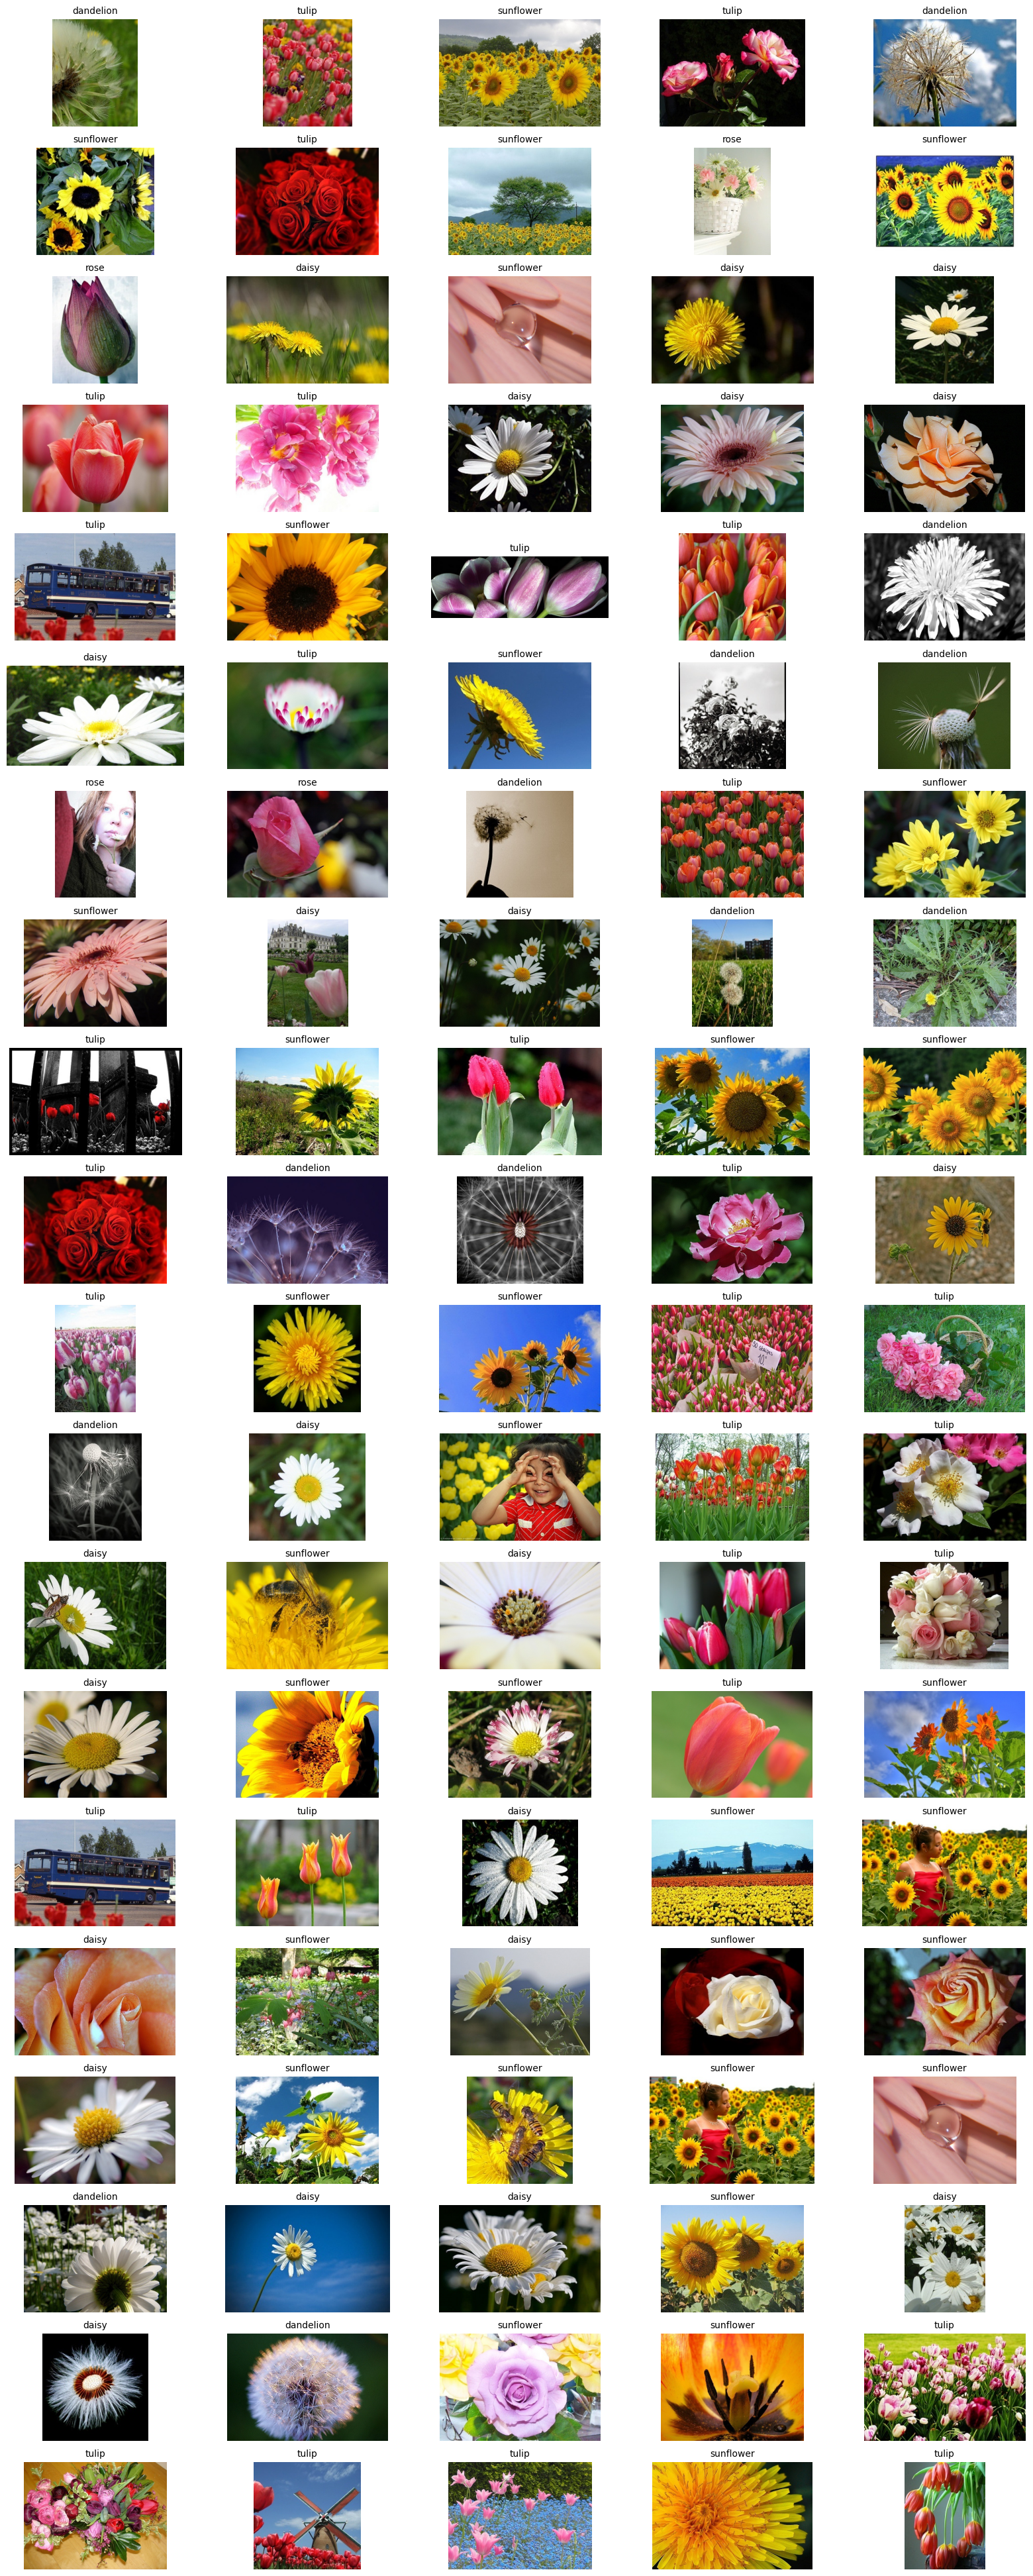

In [20]:
def pred(i):
    test_image_path = "Data/val/Image_" + str(i) + ".jpg"
    predicted_class = predict_image_class(test_image_path)
    return(predicted_class)

import random
import cv2

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 50))

for i in range(1,101):
    x = random.choice(range(900))
    print(x)
    fig.add_subplot(20,5,i)
    img = cv2.cvtColor(cv2.imread("Data/val/Image_" + str(x) + ".jpg"),cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    plt.title(pred(x), fontsize=10)
    

    

In [5]:
# model.save("VGG16.keras")

In [40]:
model.evaluate()

ValueError: Failed to find data adapter that can handle input: <class 'NoneType'>, <class 'NoneType'>

dict